<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-05-08 11:43:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-05-08 11:43:33 (926 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [4]:
data=pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
x=data[np.array(data.columns[0:5:1])].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [16]:
s=preprocessing.LabelEncoder()
s.fit(['F','M'])
x[:,1]=s.transform(x[:,1])

b=preprocessing.LabelEncoder()
b.fit(['LOW','NORMAL','HIGH'])
x[:,2]=b.transform(x[:,2])

c=preprocessing.LabelEncoder()
c.fit(['NORMAL','HIGH'])
x[:,3]=c.transform(x[:,3])

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [17]:
y=data[['Drug']].values
y[0:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

In [0]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=3)

In [34]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dtree.fit(train_x,train_y)
prediction=dtree.predict(test_x)

In [36]:
print(prediction)
print("accuracy of our model is:",metrics.accuracy_score(prediction,test_y))

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX']
accuracy of our model is: 1.0


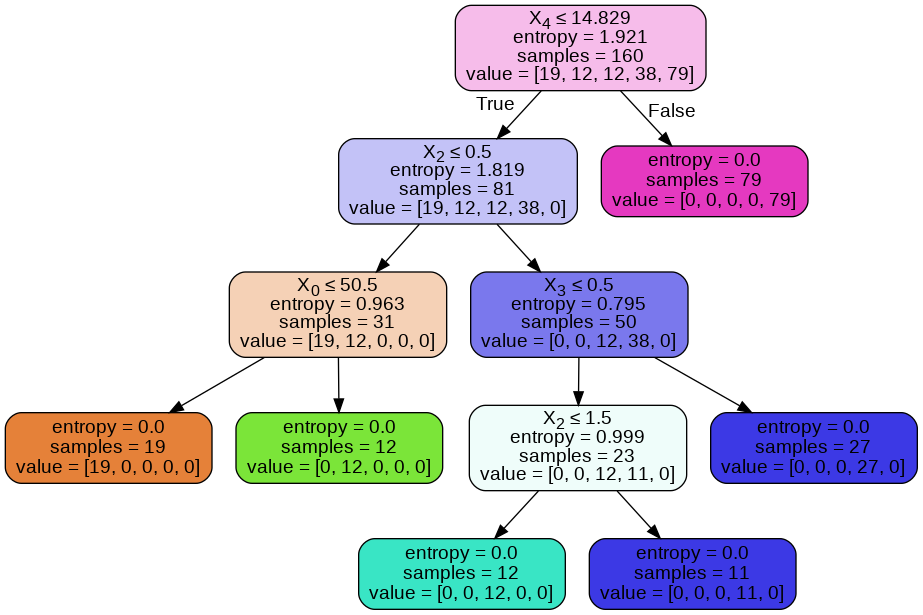

In [39]:
dt=StringIO()
export_graphviz(dtree,out_file=dt,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dt.getvalue())
Image(graph.create_png(),width=800,height=500)